In [38]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

train=pd.read_csv("~/data/data/bike-sharing-demand/train.csv")

In [39]:
train

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0000,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0000,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0000,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0000,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0000,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...
10881,2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336
10882,2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241
10883,2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168
10884,2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129


In [40]:
train["datetime"]=pd.to_datetime(train["datetime"])
train = train.assign(
    year=train["datetime"].dt.year,
    month=train["datetime"].dt.month,
    day=train["datetime"].dt.day,
    hour=train["datetime"].dt.hour,
    minute=train["datetime"].dt.minute,
    second=train["datetime"].dt.second
)

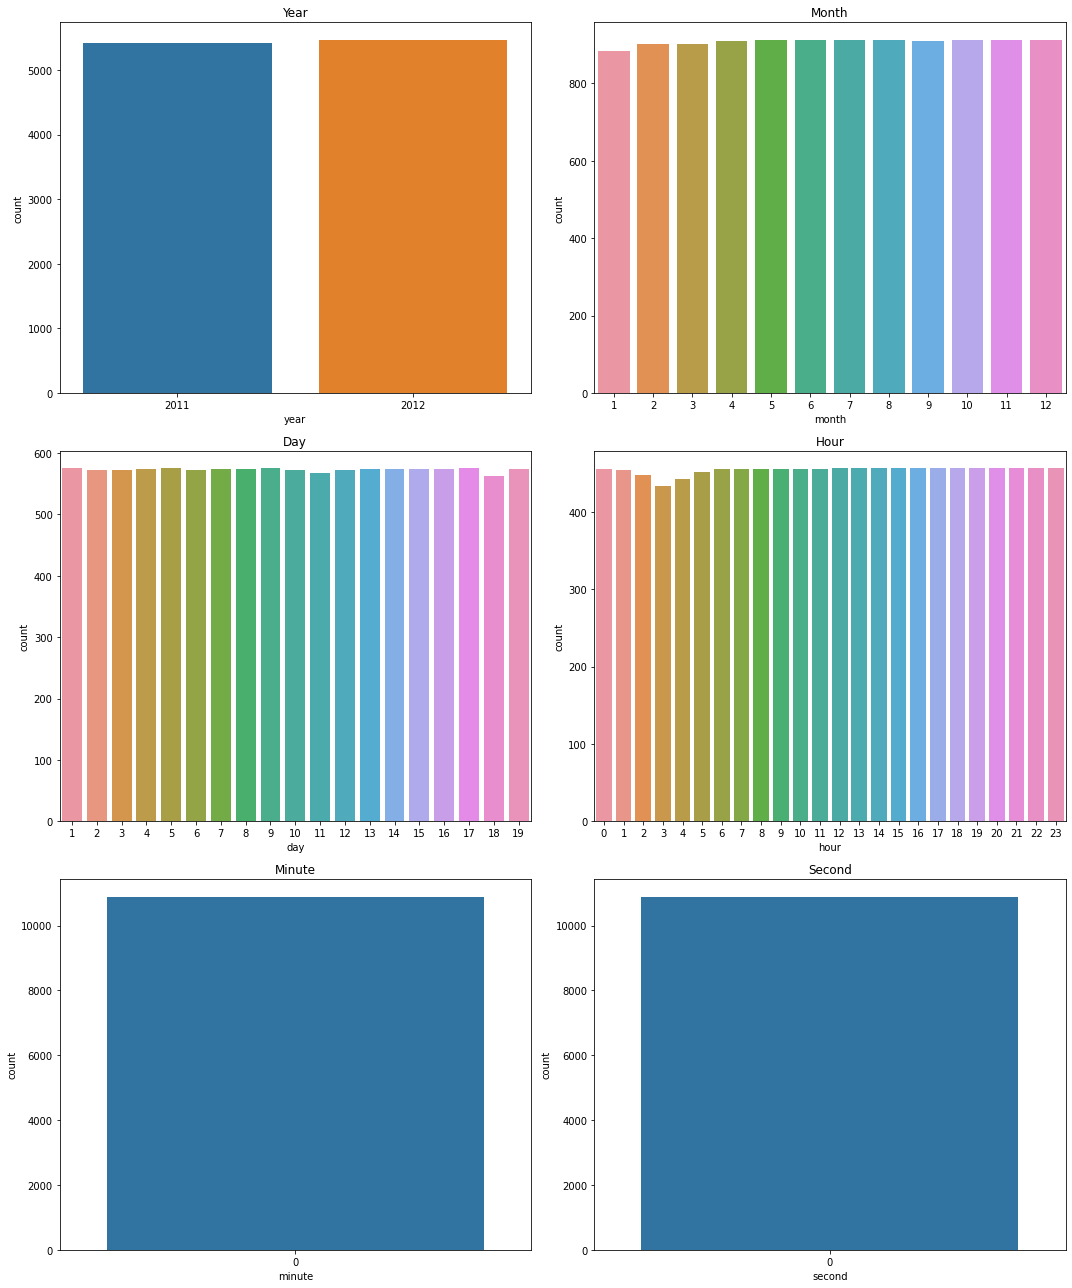

In [41]:
plt.figure(figsize=(15, 18))

plt.subplot(3, 2, 1)  
sns.countplot(x='year', data=train)
plt.title('Year')

plt.subplot(3, 2, 2) 
sns.countplot(x='month', data=train)
plt.title('Month')

plt.subplot(3, 2, 3)  
sns.countplot(x='day', data=train)
plt.title('Day')

plt.subplot(3, 2, 4)  
sns.countplot(x='hour', data=train)
plt.title('Hour')

plt.subplot(3, 2, 5)  
sns.countplot(x='minute', data=train)
plt.title('Minute')

plt.subplot(3, 2, 6)  
sns.countplot(x='second', data=train)
plt.title('Second')

plt.tight_layout()
plt.show()

In [45]:
X = train.drop(columns=["datetime", "casual", "registered", "count"])
y = train["count"]

In [46]:
X.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,minute,second
0,1,0,0,1,9.84,14.395,81,0.0,2011,1,1,0,0,0
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,1,0,0
2,1,0,0,1,9.02,13.635,80,0.0,2011,1,1,2,0,0
3,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,3,0,0
4,1,0,0,1,9.84,14.395,75,0.0,2011,1,1,4,0,0


In [47]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=100)


In [48]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [49]:
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f"MSE: {mse}")
print(f"RMSE: {rmse}")

MSE: 18975.451626766757
RMSE: 137.7514124311136


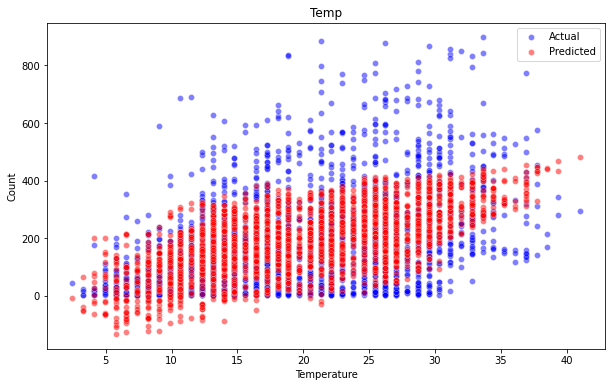

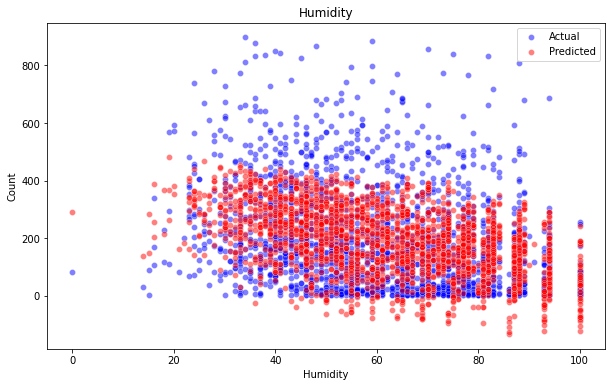

In [51]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test["temp"], y=y_test, label='Actual', color='blue', alpha=0.5)
sns.scatterplot(x=X_test["temp"], y=y_pred, label='Predicted', color='red', alpha=0.5)
plt.title('Temp')
plt.xlabel('Temperature')
plt.ylabel('Count')
plt.legend()
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_test["humidity"], y=y_test, label='Actual', color='blue', alpha=0.5)
sns.scatterplot(x=X_test["humidity"], y=y_pred, label='Predicted', color='red', alpha=0.5)
plt.title('Humidity')
plt.xlabel('Humidity')
plt.ylabel('Count')
plt.legend()
plt.show()